In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("dota.csv")
df.head()

,steam_id,match_id,player_slot,kills,deaths,assists,xpm,gpm,hero_id,duration,last_hits,lane,lane_role,start_time,hero_damage,hero_healing,apm,time_spent_dead
0,118728071,6920406682,4,10,2,8,560,426,26,1929,88,2,2,1671165229,14894,0,164,61
1,112127522,6920406682,1,8,0,9,684,646,41,1929,259,1,1,1671165229,15797,0,196,0
2,122334023,6914136246,1,10,5,27,670,370,5,2215,31,1,1,1670809762,28118,0,135,213
3,106975318,6809430182,132,5,9,17,498,303,30,2785,39,3,1,1665973075,14766,6090,142,370
4,110352369,6864995865,130,4,16,7,628,456,80,2406,201,3,1,1668487002,11890,0,283,717


In [2]:
db = df[['steam_id', 'match_id']]
df['steam_id'].dtypes, df['match_id'].dtypes,"\n",db['steam_id'].dtypes, db['match_id'].dtypes



(dtype('int64'), dtype('int64'), '\n', dtype('int64'), dtype('int64'))

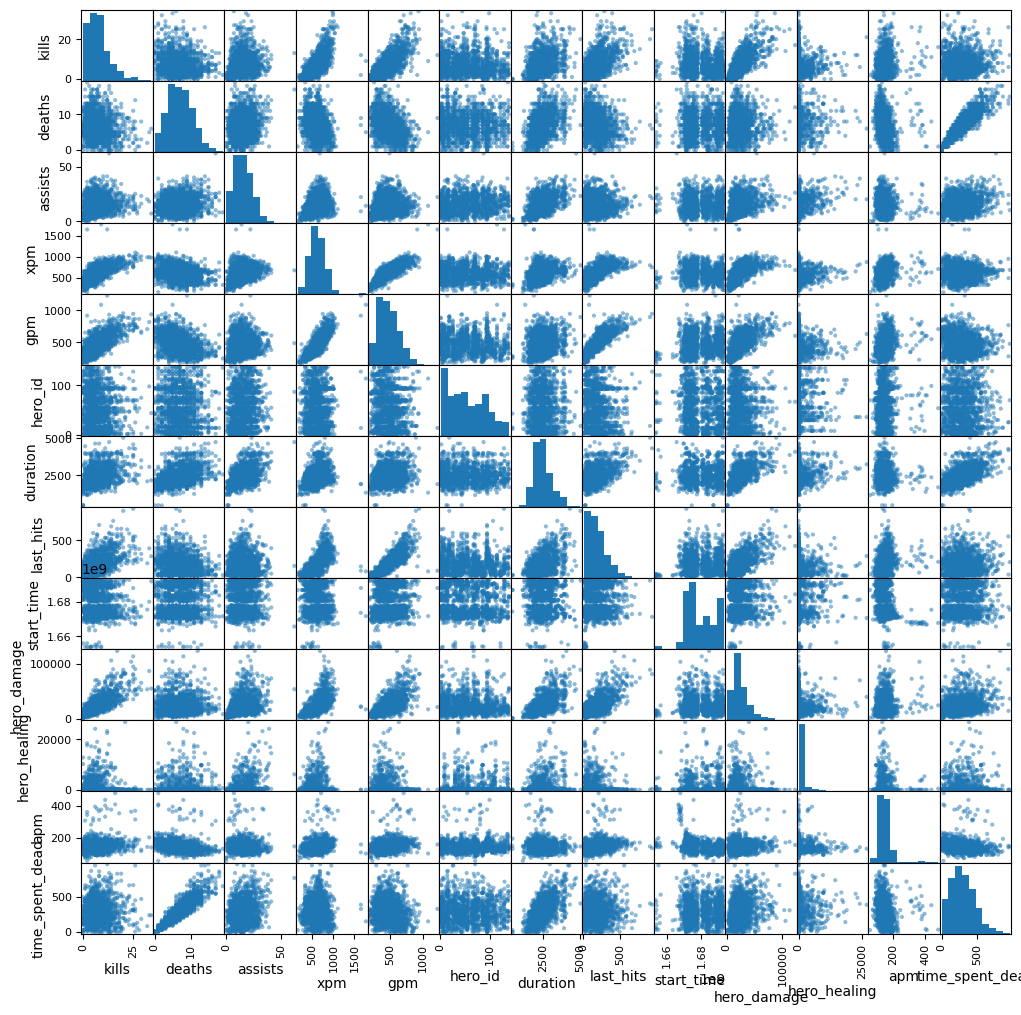

In [3]:
pd.plotting.scatter_matrix(df.loc[:,~df.columns.isin(['steam_id','match_id','player_slot','lane','lane_role'])],figsize=(12,12));

<Axes: >

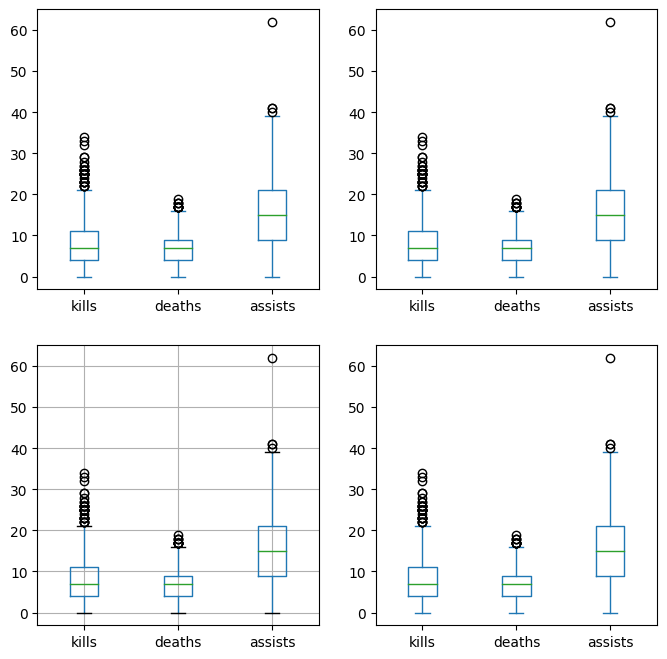

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2,figsize=(8,8))
df.plot('xpm',['kills','deaths','assists'],kind='box',ax = ax[0,0]) # matches 2 and 4 but is formatted wrong
df.plot(column=['kills','deaths','assists'],kind="box",ax=ax[0,1]) # matches 4th
df.boxplot(column=['kills','deaths','assists'],ax=ax[1,0])  # i dont fucking know
df.plot.box(column=['kills','deaths','assists'],ax=ax[1,1]) # matches second



,kills,deaths
count,1314.000000,1314.000000
mean,7.724505,6.992390
std,5.456905,3.618511
min,0.000000,0.000000
25%,4.000000,4.000000
50%,7.000000,7.000000
75%,11.000000,9.000000
max,34.000000,19.000000


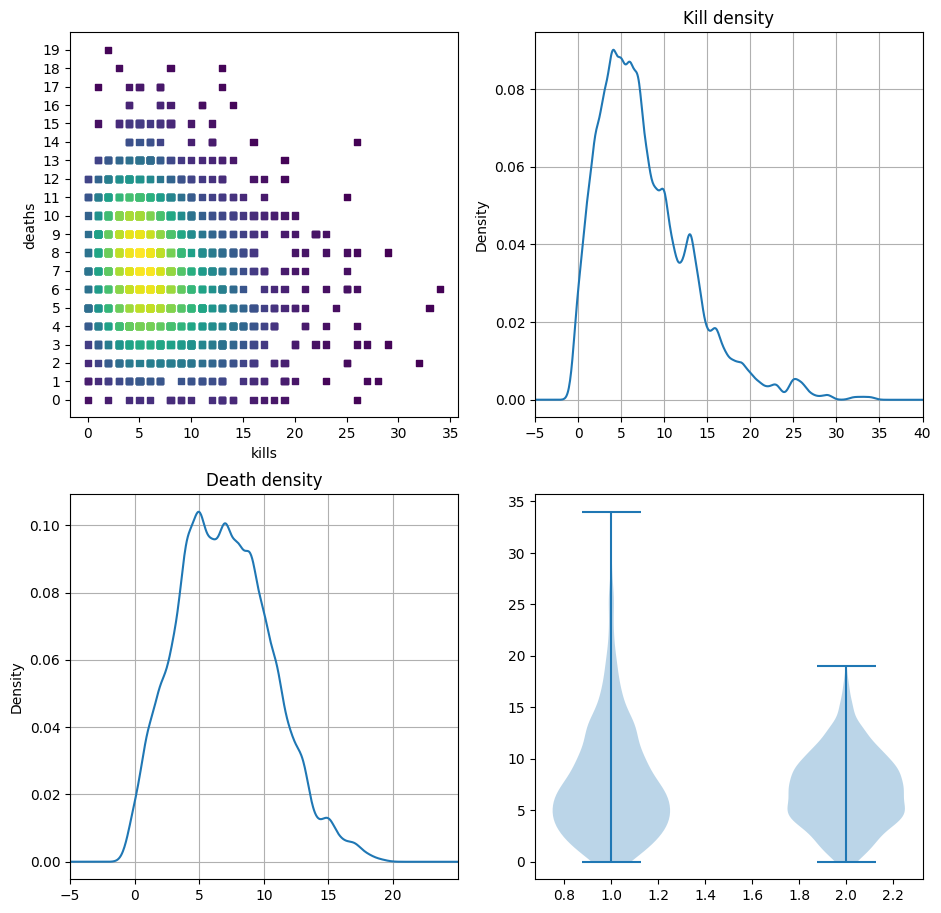

In [5]:
from scipy.stats import gaussian_kde
fig, ax = plt.subplots(2,2,figsize=(11,11))
kd = np.vstack([df['kills'],df['deaths']])
z = gaussian_kde(kd)(kd)

df.plot.scatter("kills",'deaths',c=z,marker=',',ax = ax[0,0],yticks=range(0,20), xticks=range(0,36,5));
df['kills'].plot.kde(bw_method = 0.1,ax = ax[0,1],grid=True,xlim=[-5,40],xticks=range(-10,45,5),title="Kill density");
#df['deaths'].plot.kde(bw_method = 0.15,ax = ax[0,1],grid=True,xlim=[-5,40],xticks=range(-10,45,3),title="Kill density",color="red");
df['deaths'].plot.kde(bw_method = 0.15,ax = ax[1,0],grid=True,xlim=[-5,25],xticks=range(-10,25,5),title="Death density");
ax[1,1].violinplot([df['kills'],df['deaths']]) 


#ax.scatter("kills","deaths",data=df,marker='.')
df[["kills","deaths"]].describe()


In [17]:
mdf = df[df["steam_id"] == 133355068 ]
mdf[['kills']]


,kills
7,12
15,8
23,14
31,6
39,2
...,...
1293,13
1309,6
1310,23
1311,3


In [108]:

def fourgraphdensity(ogdf,df,numstat1,numstat2,title=""):
    max1 = ogdf[numstat1].max()
    min1 = ogdf[numstat1].min()

    max2 = ogdf[numstat2].max()
    min2 = ogdf[numstat2].min()
    range1 = max1 - min1
    extra1 = int(range1/6)

    range2 = max2 - min2
    extra2 = int(range2/6)

    fig, ax = plt.subplots(2,2,figsize=(11,11))
    fig.suptitle(title,fontsize="20")

    ddd = np.vstack([df[numstat1],df[numstat2]])
    z = gaussian_kde(ddd)(ddd)

    df.plot.scatter(numstat1,numstat2,c=z,marker=',',ax = ax[0,0],yticks=range(0,21), xticks=range(0,36,5));
    df[numstat1].plot.kde(bw_method = 0.2,ax = ax[0,1],grid=True,xlim=[min1-extra1,max1+extra1],xticks=range(-extra1,ogdf[numstat1].max()+extra1,4),title=f"{numstat1} density");
    df[numstat2].plot.kde(bw_method = 0.2,ax = ax[1,0],grid=True,xlim=[min2-extra2,max2+extra2],xticks=range(-extra2,ogdf[numstat2].max()+extra2,2),title=f"{numstat2} density");
    ax[1,1].violinplot([df[numstat1],df[numstat2]],showmeans=True) 
    

    #ax.scatter("kills","deaths",data=df,marker='.')
    df[[numstat1,numstat2]].describe()

    

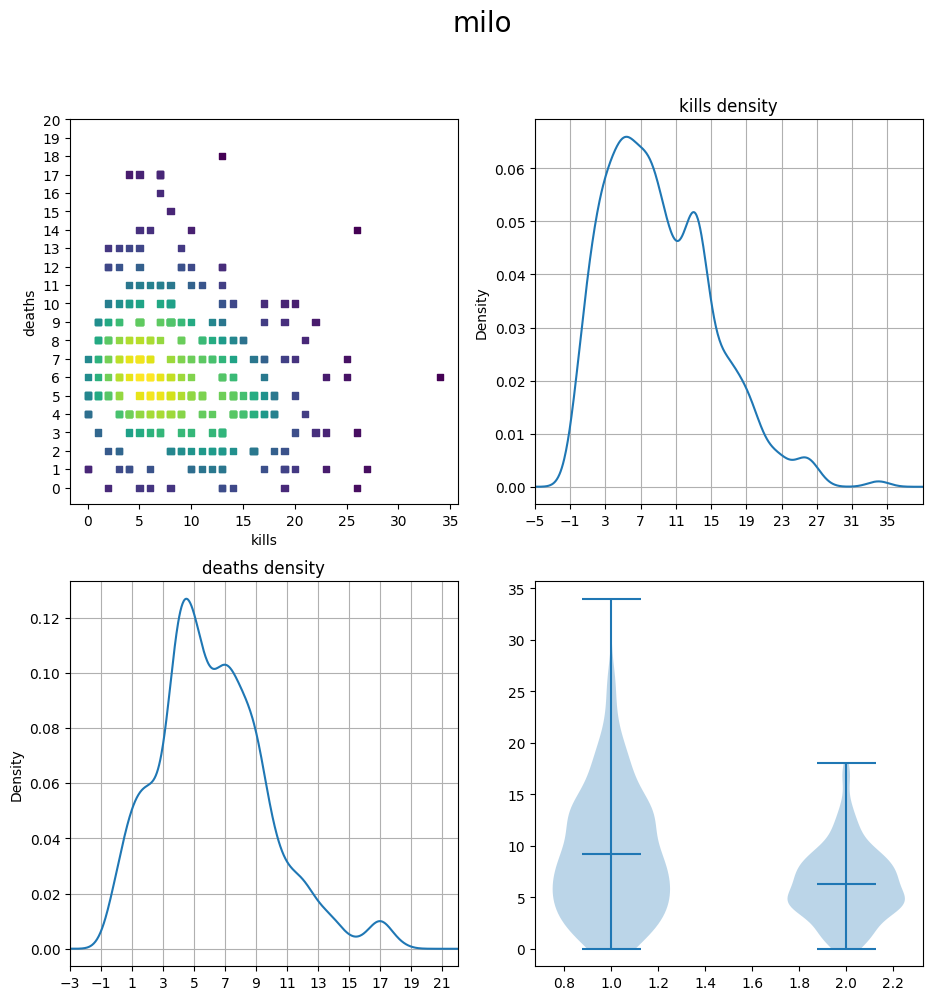

In [109]:
fourgraphdensity(df,mdf,"kills","deaths",title='milo')

,kills,deaths
count,103.000000,103.000000
mean,9.592233,7.067961
std,5.589621,3.036581
min,0.000000,0.000000
25%,5.000000,5.000000
50%,9.000000,7.000000
75%,13.500000,9.000000
max,27.000000,15.000000


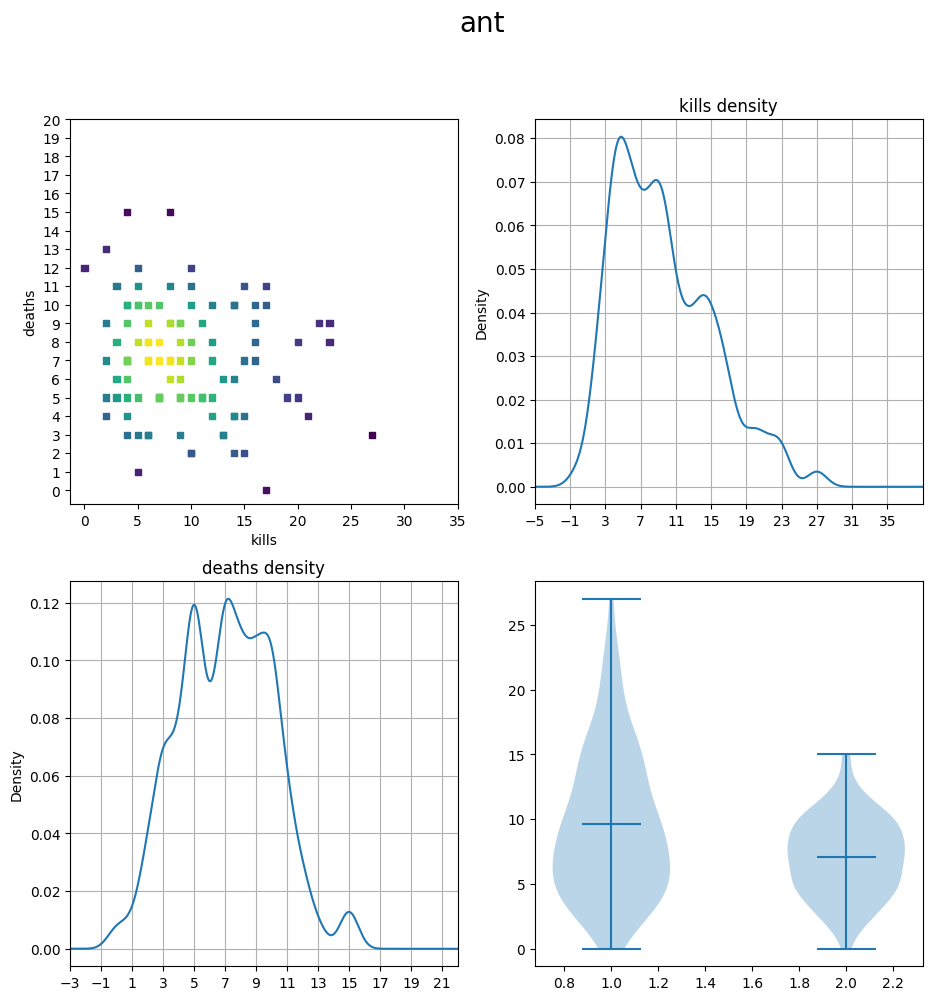

In [116]:
adf = df[df['steam_id'] == 118728071]
fourgraphdensity(df,adf,"kills","deaths",title="ant")
adf[['kills','deaths']].describe()

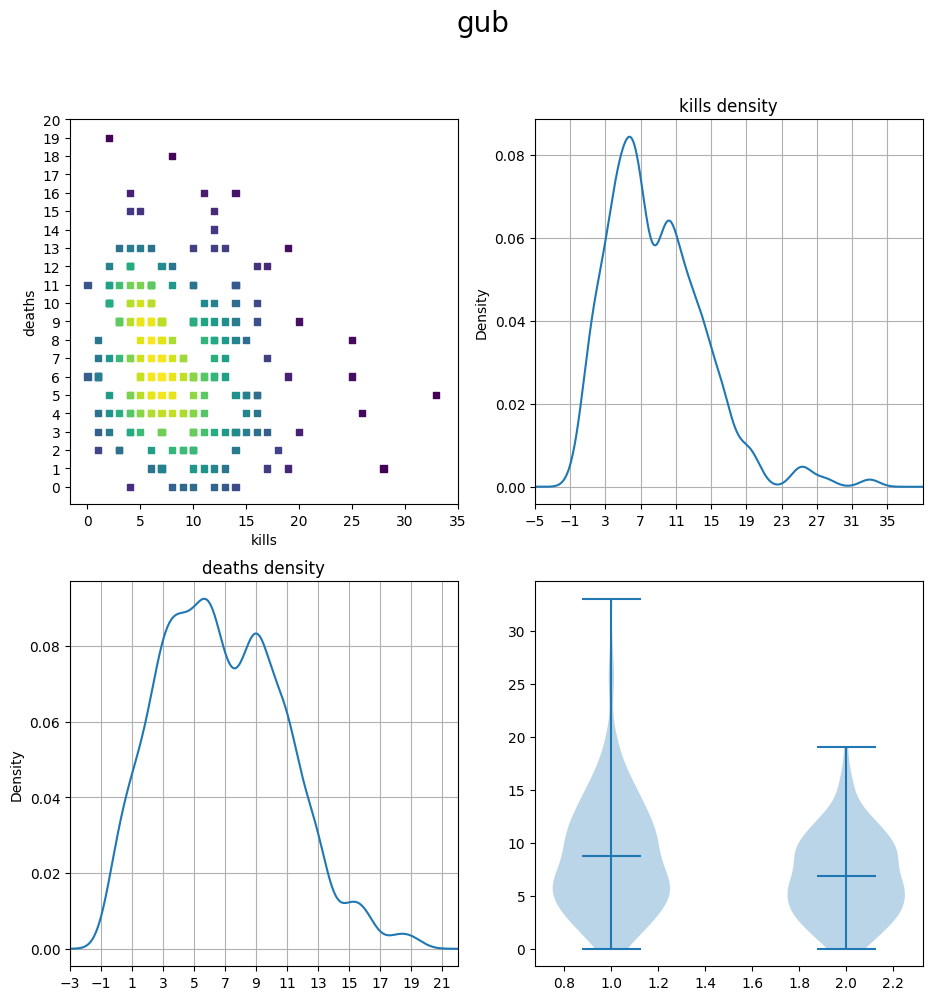

In [113]:
gdf = df[df['steam_id'] == 112127522]
fourgraphdensity(df,gdf,"kills","deaths",title="gub")

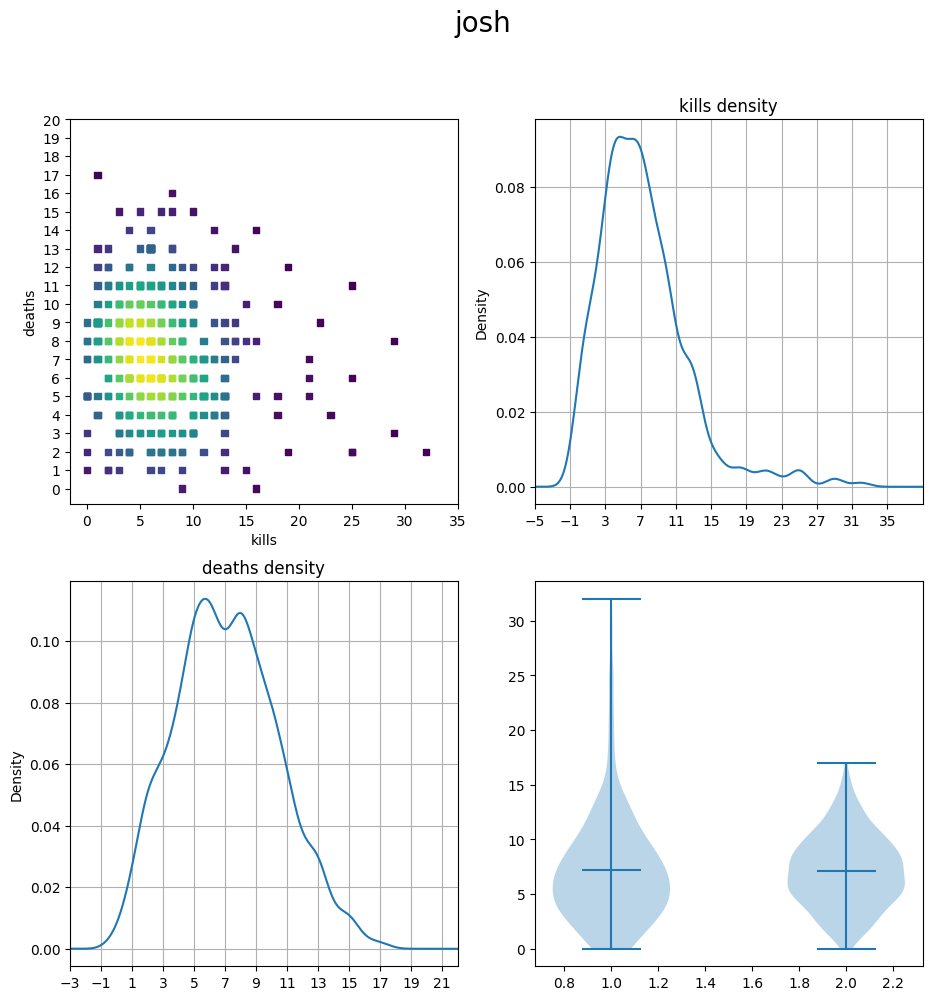

In [114]:
jdf = df[df['steam_id'] == 380821421]
fourgraphdensity(df,jdf,"kills","deaths",title="josh")